### Loading Data from Kaggle

In [42]:
# Import Packages
import pandas as pd

# Loading heart disease UCI dataset
# Source: https://www.kaggle.com/datasets/navjotkaushal/heart-disease-uci-dataset
heart_disease = pd.read_csv("data/heart_disease_UCI_dataset.csv")
print("Heart Disease:\n", heart_disease.head())

# Get the number of rows and columns in the dataset
num_rows, num_cols = heart_disease.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Heart Disease:
    age     sex              cp  trestbps   chol    fbs         restecg  \
0   63    Male  typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male    asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male    asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male     non-anginal     130.0  250.0  False          normal   
4   41  Female  typical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak  num  
0   150.0  False      2.3    0  
1   108.0   True      1.5    2  
2   129.0   True      2.6    1  
3   187.0  False      3.5    0  
4   172.0  False      1.4    0  
Number of rows: 918, Number of columns: 11


### Data Cleaning 

In [43]:
# Check to see if the data types are listed correctly
print("Data type for each column:\n", heart_disease.dtypes)

# Check for missing values
print("Missing values:\n", heart_disease.isnull().sum())

# Check for duplicates
print("Duplicates:", heart_disease.duplicated().sum())

# Data Summary
print("Summary of Data:\n", heart_disease.describe())

Data type for each column:
 age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
num           int64
dtype: object
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64
Duplicates: 0
Summary of Data:
               age    trestbps        chol      thalch    oldpeak         num
count  918.000000  918.000000  918.000000  918.000000  918.00000  918.000000
mean    53.510893  132.141612  199.862745  137.689542    0.85512    0.995643
std      9.432617   17.924706  109.154522   25.153455    1.05845    1.142985
min     28.000000   80.000000    0.000000   60.000000   -2.60000    0.000000
25%     47.000000  120.000000  177.250000  120.000000    0.00000    0.000000
50%     54.000000  130.000000  223.000000  140.000000    0.5

In [ ]:
# Calculate z-scores for numeric columns
import numpy as np
from scipy.stats import zscore

numeric_cols = heart_disease.select_dtypes(include=[np.number])
z_scores = numeric_cols.apply(zscore)
outliers = (z_scores.abs() > 3).any(
    axis=1
)  # Flag outliers: rows where any z-score is above 3 or below -3
heart_disease = heart_disease[~outliers]

print("After outlier removalm shape:", heart_disease.shape)
print("Summary of Data:\n", heart_disease.describe())

After outlier removalm shape: (900, 11)


### Inspect the Data (Data Visualization)

<Axes: >

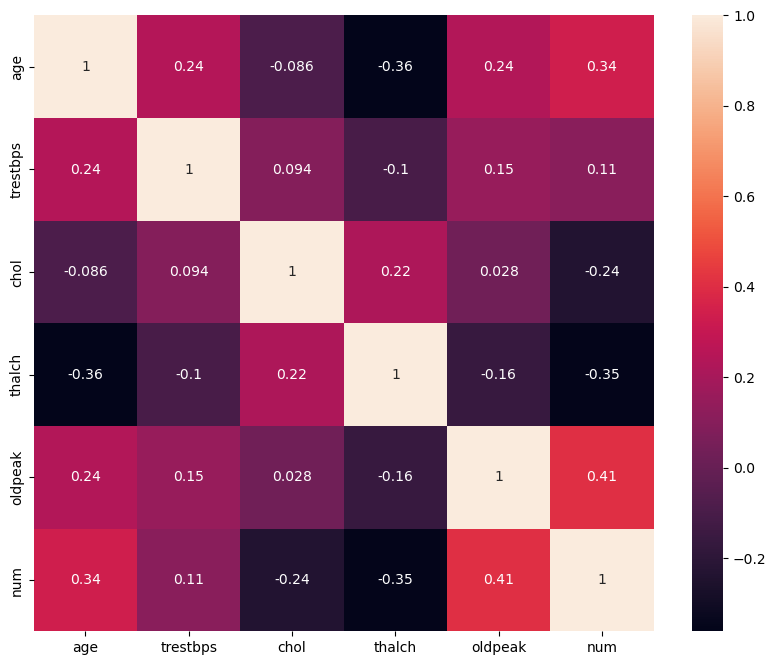

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap to show the summary of relationships among numeric features
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_cols = heart_disease.select_dtypes(include=["number"])
sns.heatmap(data=numeric_cols.corr(), annot=True)

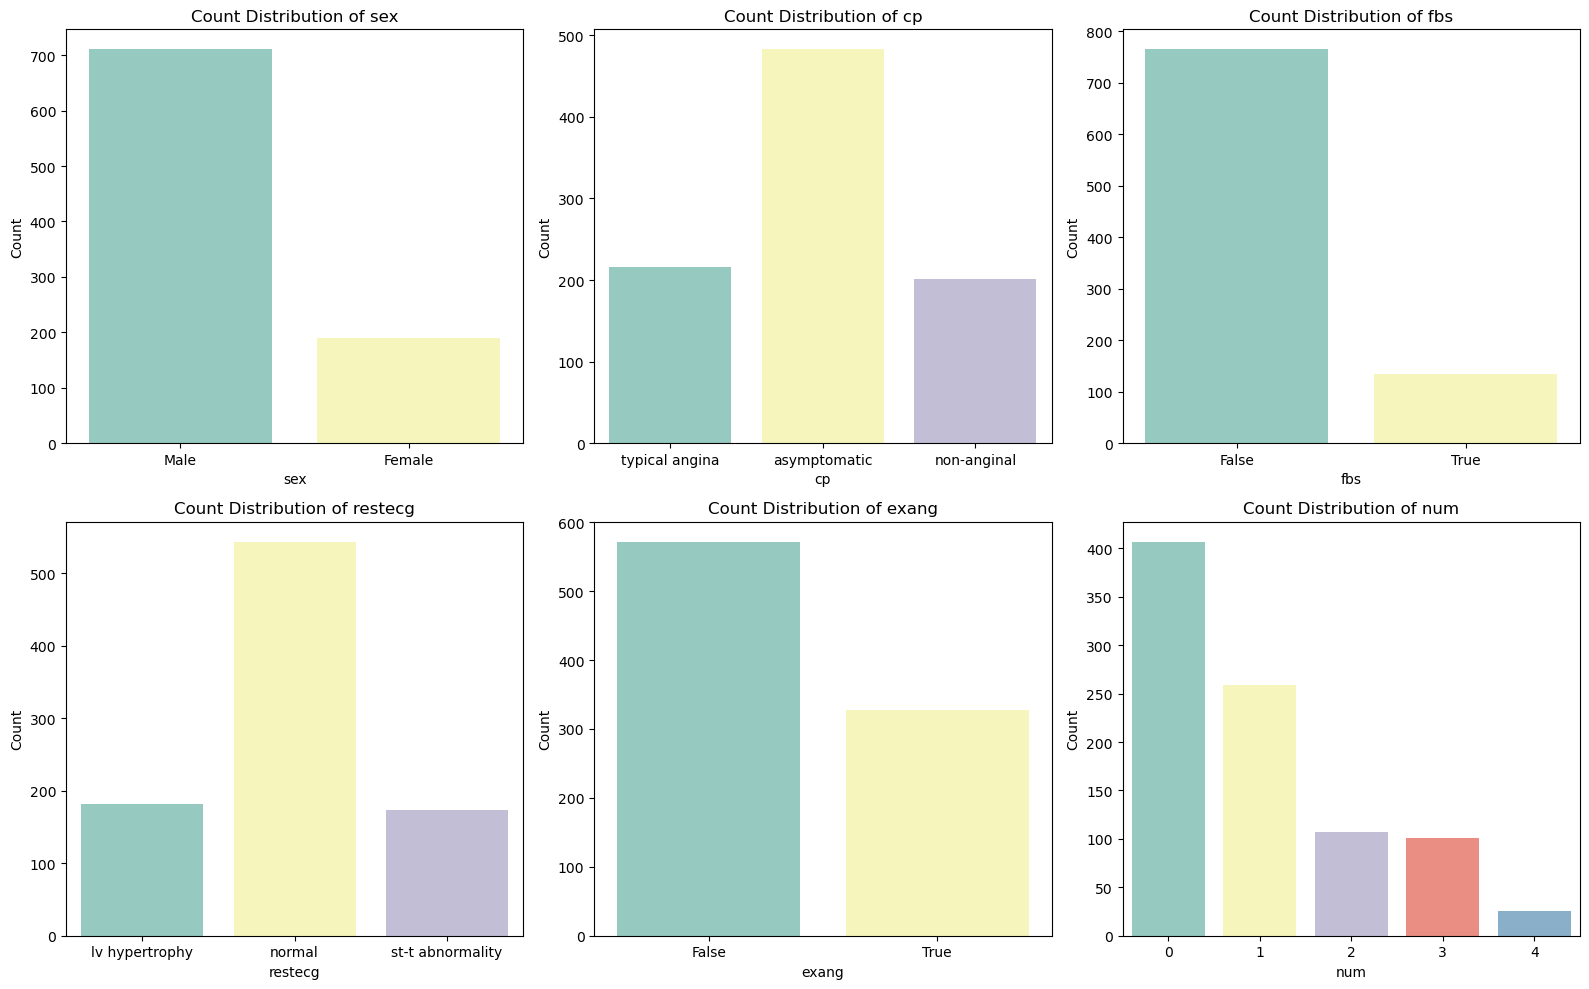

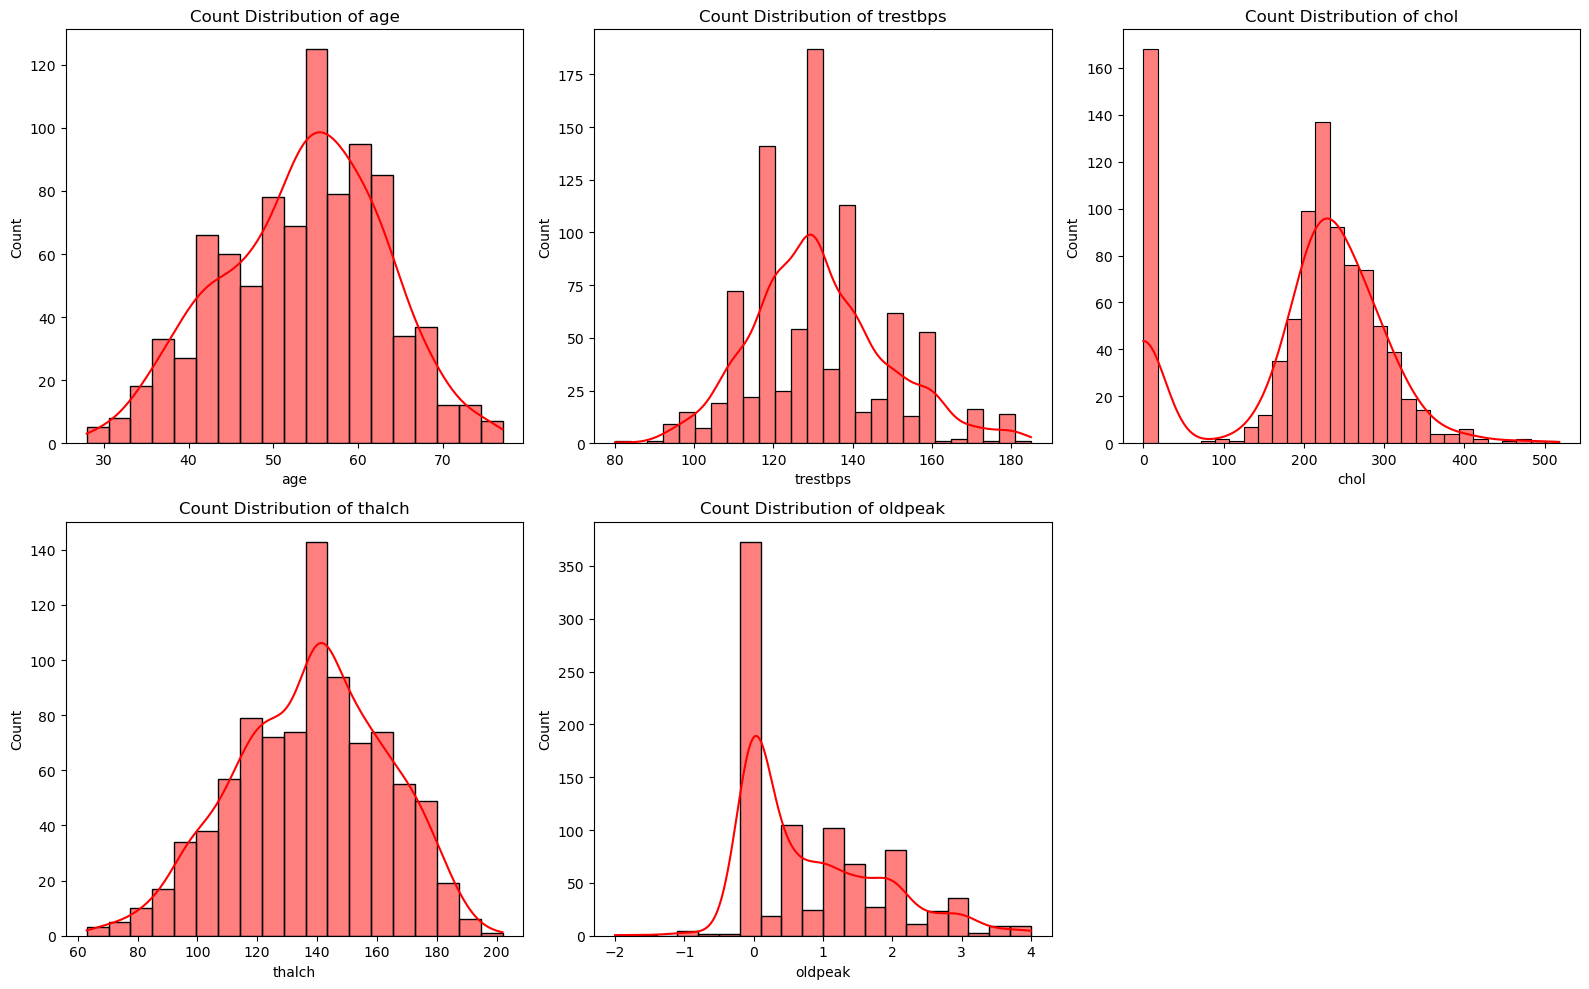

In [ ]:
# Visualize count-based distribution for categorical features
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "num"]
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=heart_disease, x=col, hue=col, palette="Set3", legend=False)
    plt.title(f"Count Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Visualize count-based distribution for numerical features
numerical_cols = ["age", "trestbps", "chol", "thalch", "oldpeak"]
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=heart_disease, x=col, kde=True, color="r")
    plt.title(f"Count Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [48]:
heart_disease.shape

(900, 11)

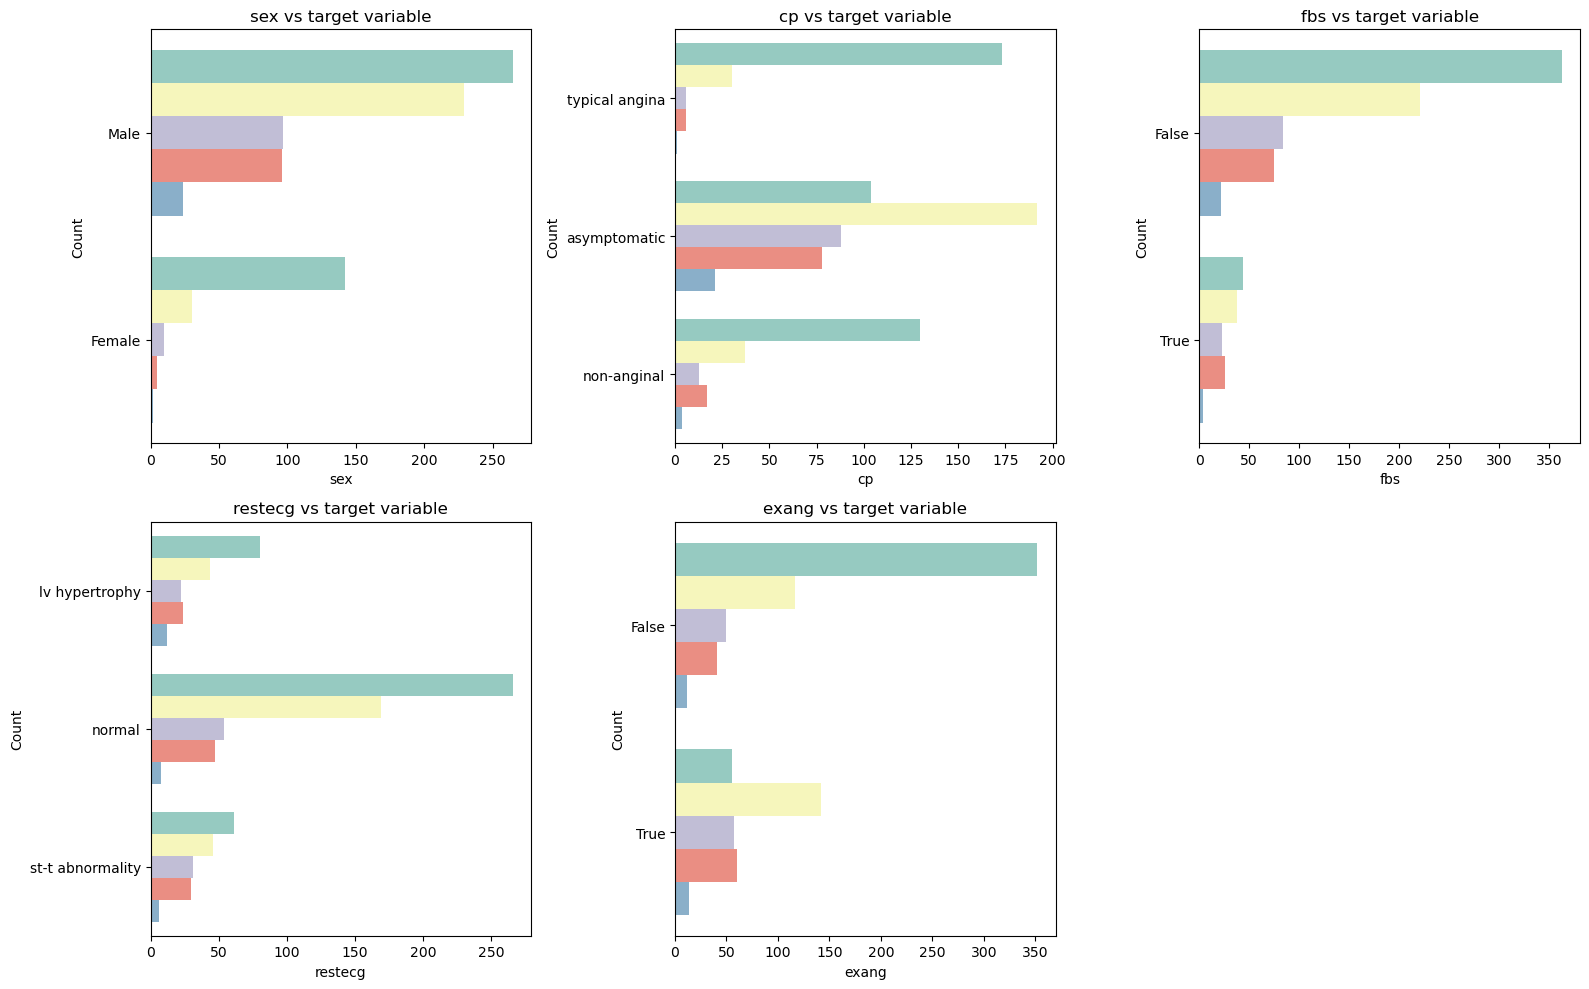

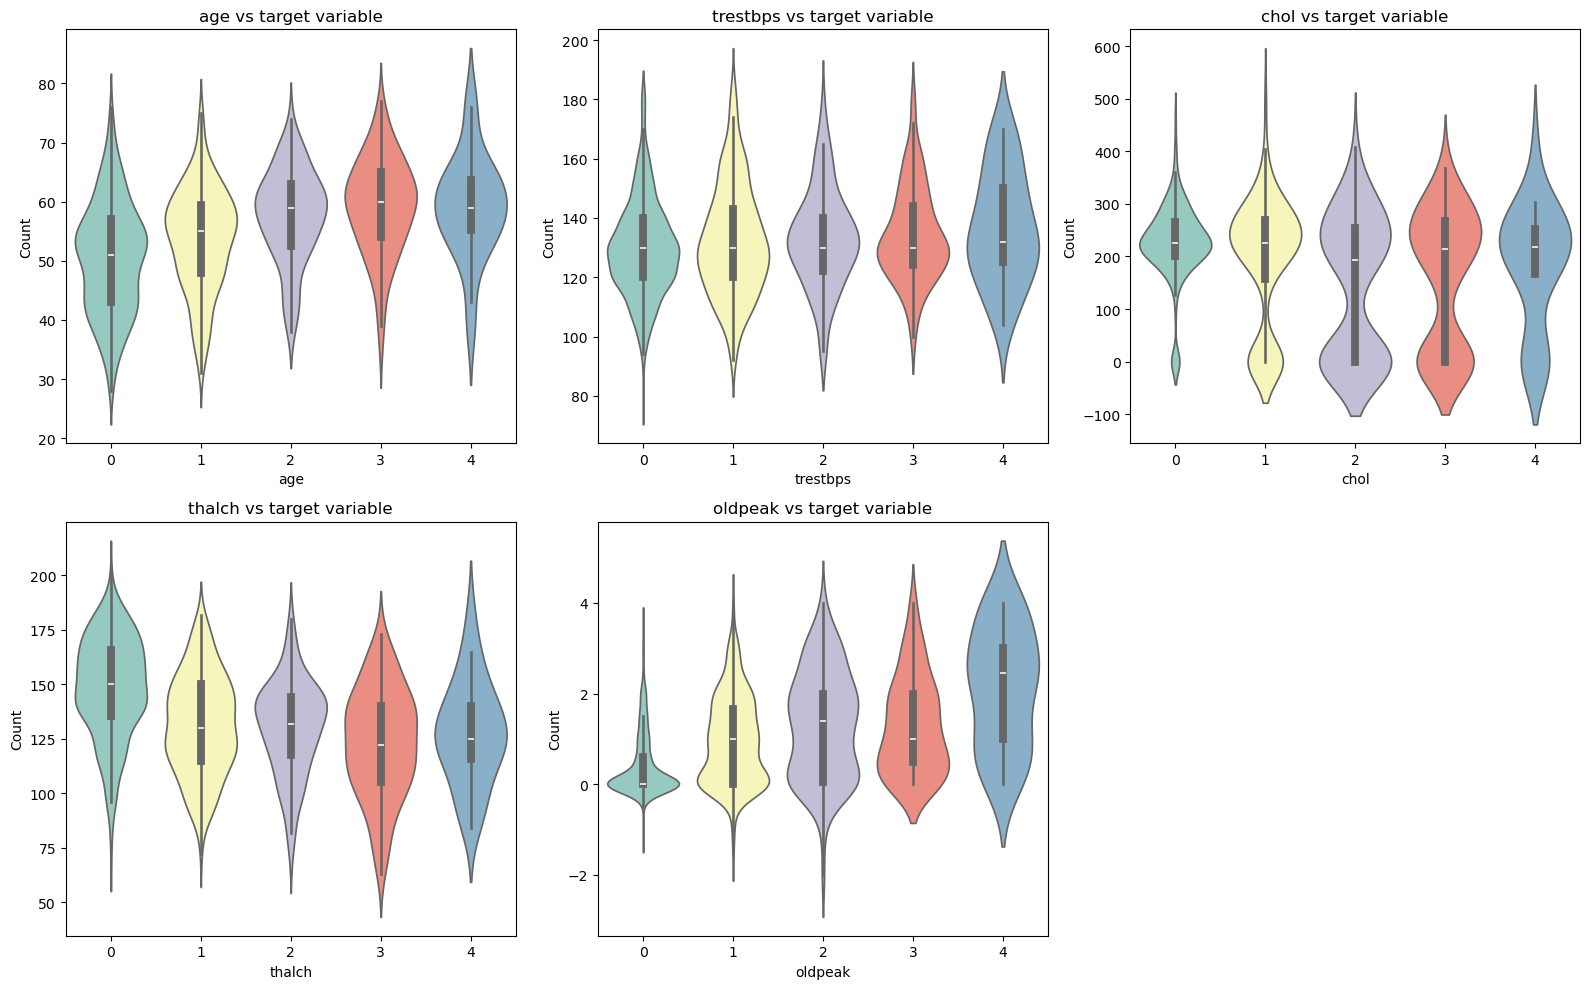

In [ ]:
# Target related distribution
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang"]
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=heart_disease, y=col, hue="num", palette="Set3", legend=False)
    plt.title(f"{col} vs target variable")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

numerical_cols = ["age", "trestbps", "chol", "thalch", "oldpeak"]
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(
        data=heart_disease, y=col, x="num", hue="num", palette="Set3", legend=False
    )
    plt.title(f"{col} vs target variable")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = heart_disease.drop(columns=["num"])
# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)
y = heart_disease["num"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")